# <span style='font-family:"Times New Roman"'> <span styel=''> **Genome Instability Exploration**

<span style='font-family:"Times New Roman"'> <span styel=''> *Emile Cohen* 
        
*April 2020*

**Goal:** In this notebook, we have all Genome Wide Instability Metrics, across subgroups or cancer types, plotted against other metrics or not.
    
The Notebook is divided in X parts:
   
* **1. Cancer Discovery**
* **2. Metrics Panels per Cancer Type**


**NB1:** In each part, you must run the cells from the begining in order to initialize the variables

**NB2:** All functions used for the plots are located in utils/custom_tools.py

---

In [11]:
%run -i '../../utils/setup_environment.ipy'
from utils.analysis_tools import *

import warnings, math
warnings.filterwarnings('ignore')
import ptitprince as pt
import IPython.display
from utils.lca_standard_graphs import *
from itertools import cycle, islice

data_path = '../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

---
# Number of chromosomes affected

In [12]:
# Loading the master
master = pd.read_pickle(data_path + 'merged_data/master_file.pkl')

## chr_affected | purity

An uncertain purity could come from a low number of copy number events at arm level, because of the functionning of FACETS. So looking at the chr_affected should give us insights about the purity.

### chr_affected distribution

#### Across Subgroups (Histograms)

In [13]:
sns.set_style("whitegrid", {'grid.color': '0.98'})
def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom=True, labelleft=True)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
def def_fig_set(figsize=(15,12), number = 6):
    fig=plt.figure(figsize=figsize)
    if number == 6:
        ax1 = plt.subplot2grid(shape=(3,7), loc=(0,0), colspan=3)
        ax2 = plt.subplot2grid((3,7), (0,4), colspan=3)
        ax3 = plt.subplot2grid((3,7), (1,0), colspan=3)
        ax4 = plt.subplot2grid((3,7), (1,4), colspan=3)
        ax5 = plt.subplot2grid((3,7), (2,0), colspan=3)
        ax6 = plt.subplot2grid((3,7), (2,4), colspan=3)
    
    if number == 5:
        ax1 = plt.subplot2grid(shape=(3,7), loc=(0,0), colspan=3)
        ax2 = plt.subplot2grid((3,7), (0,4), colspan=3)
        ax3 = plt.subplot2grid((3,7), (1,0), colspan=3)
        ax4 = plt.subplot2grid((3,7), (1,4), colspan=3)
        ax5 = plt.subplot2grid((3,7), (2,2), colspan=3)
    
    if number == 4:
        ax1 = plt.subplot2grid(shape=(3,7), loc=(0,0), colspan=3)
        ax2 = plt.subplot2grid((3,7), (0,4), colspan=3)
        ax3 = plt.subplot2grid((3,7), (1,0), colspan=3)
        ax4 = plt.subplot2grid((3,7), (1,4), colspan=3)
    
    annotate_axes(fig)
    
    return fig

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


my_colors = list(islice(cycle(list(sns.color_palette("muted"))), None, 6))
my_colors_set = []
# We define 10 colors from each colors
for color in my_colors:
    to_append = []
    for i in range(1,11):
        to_append.append(lighten_color(color, amount=0.1*i))
    my_colors_set.append(to_append)




def get_densities(master:pd.DataFrame, metrics:str, fig_title:str, xlabel, ylabel,  number=6, met_prim:str = None, clip = (0.0,3.0), x_lim =[0,1]):
    # We initialize the figure
    fig = def_fig_set(number = number)
    fig.tight_layout(pad=10, w_pad=0.5, h_pad=10)
    fig.suptitle(fig_title, fontsize=16, weight='bold')
    
    # We differentiate the groups if we have 
    if number==6: groups = ['>=1_LOSS', 'HOMDEL', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', '0_HETLOSS']
    if number==5: groups = ['>=1_LOSS', 'HOMDEL', '1_WILD_TYPE', '>1muts', '>=1_cnLOH']
        
    for ax, group,i in zip(fig.axes, groups, range(len(groups))):
        data = master[master['mut_cn_group'] == group]
        if met_prim:
            data = data[data['Sample_Type'] == met_prim]
        sns.distplot(data[metrics], hist=True,kde_kws={'clip': clip, "shade": True}, ax=ax, color=my_colors[i])
        ax.set_xlim(x_lim)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        
        # Adding MEan and Median Information
        mean=round(data[metrics].mean(),2) ; median=round(data[metrics].median(),2)
        string = 'Mean: '+ str(mean) +'\nMedian: ' + str(median)
        ax.axvline(mean, color='g', linestyle='-', label='Mean: '+ str(mean))
        ax.axvline(median, color='b', linestyle='-', label='Median: ' + str(median))
        ax.legend()
        
        ax.set_title(group, weight = 'bold')

In [14]:
display(pd.DataFrame(master.chr_affected.describe()))

chr_affected
count  29259.000000
mean      11.010458
std        7.394143
min        0.000000
25%        5.000000
50%        9.000000
75%       20.000000
max       22.000000

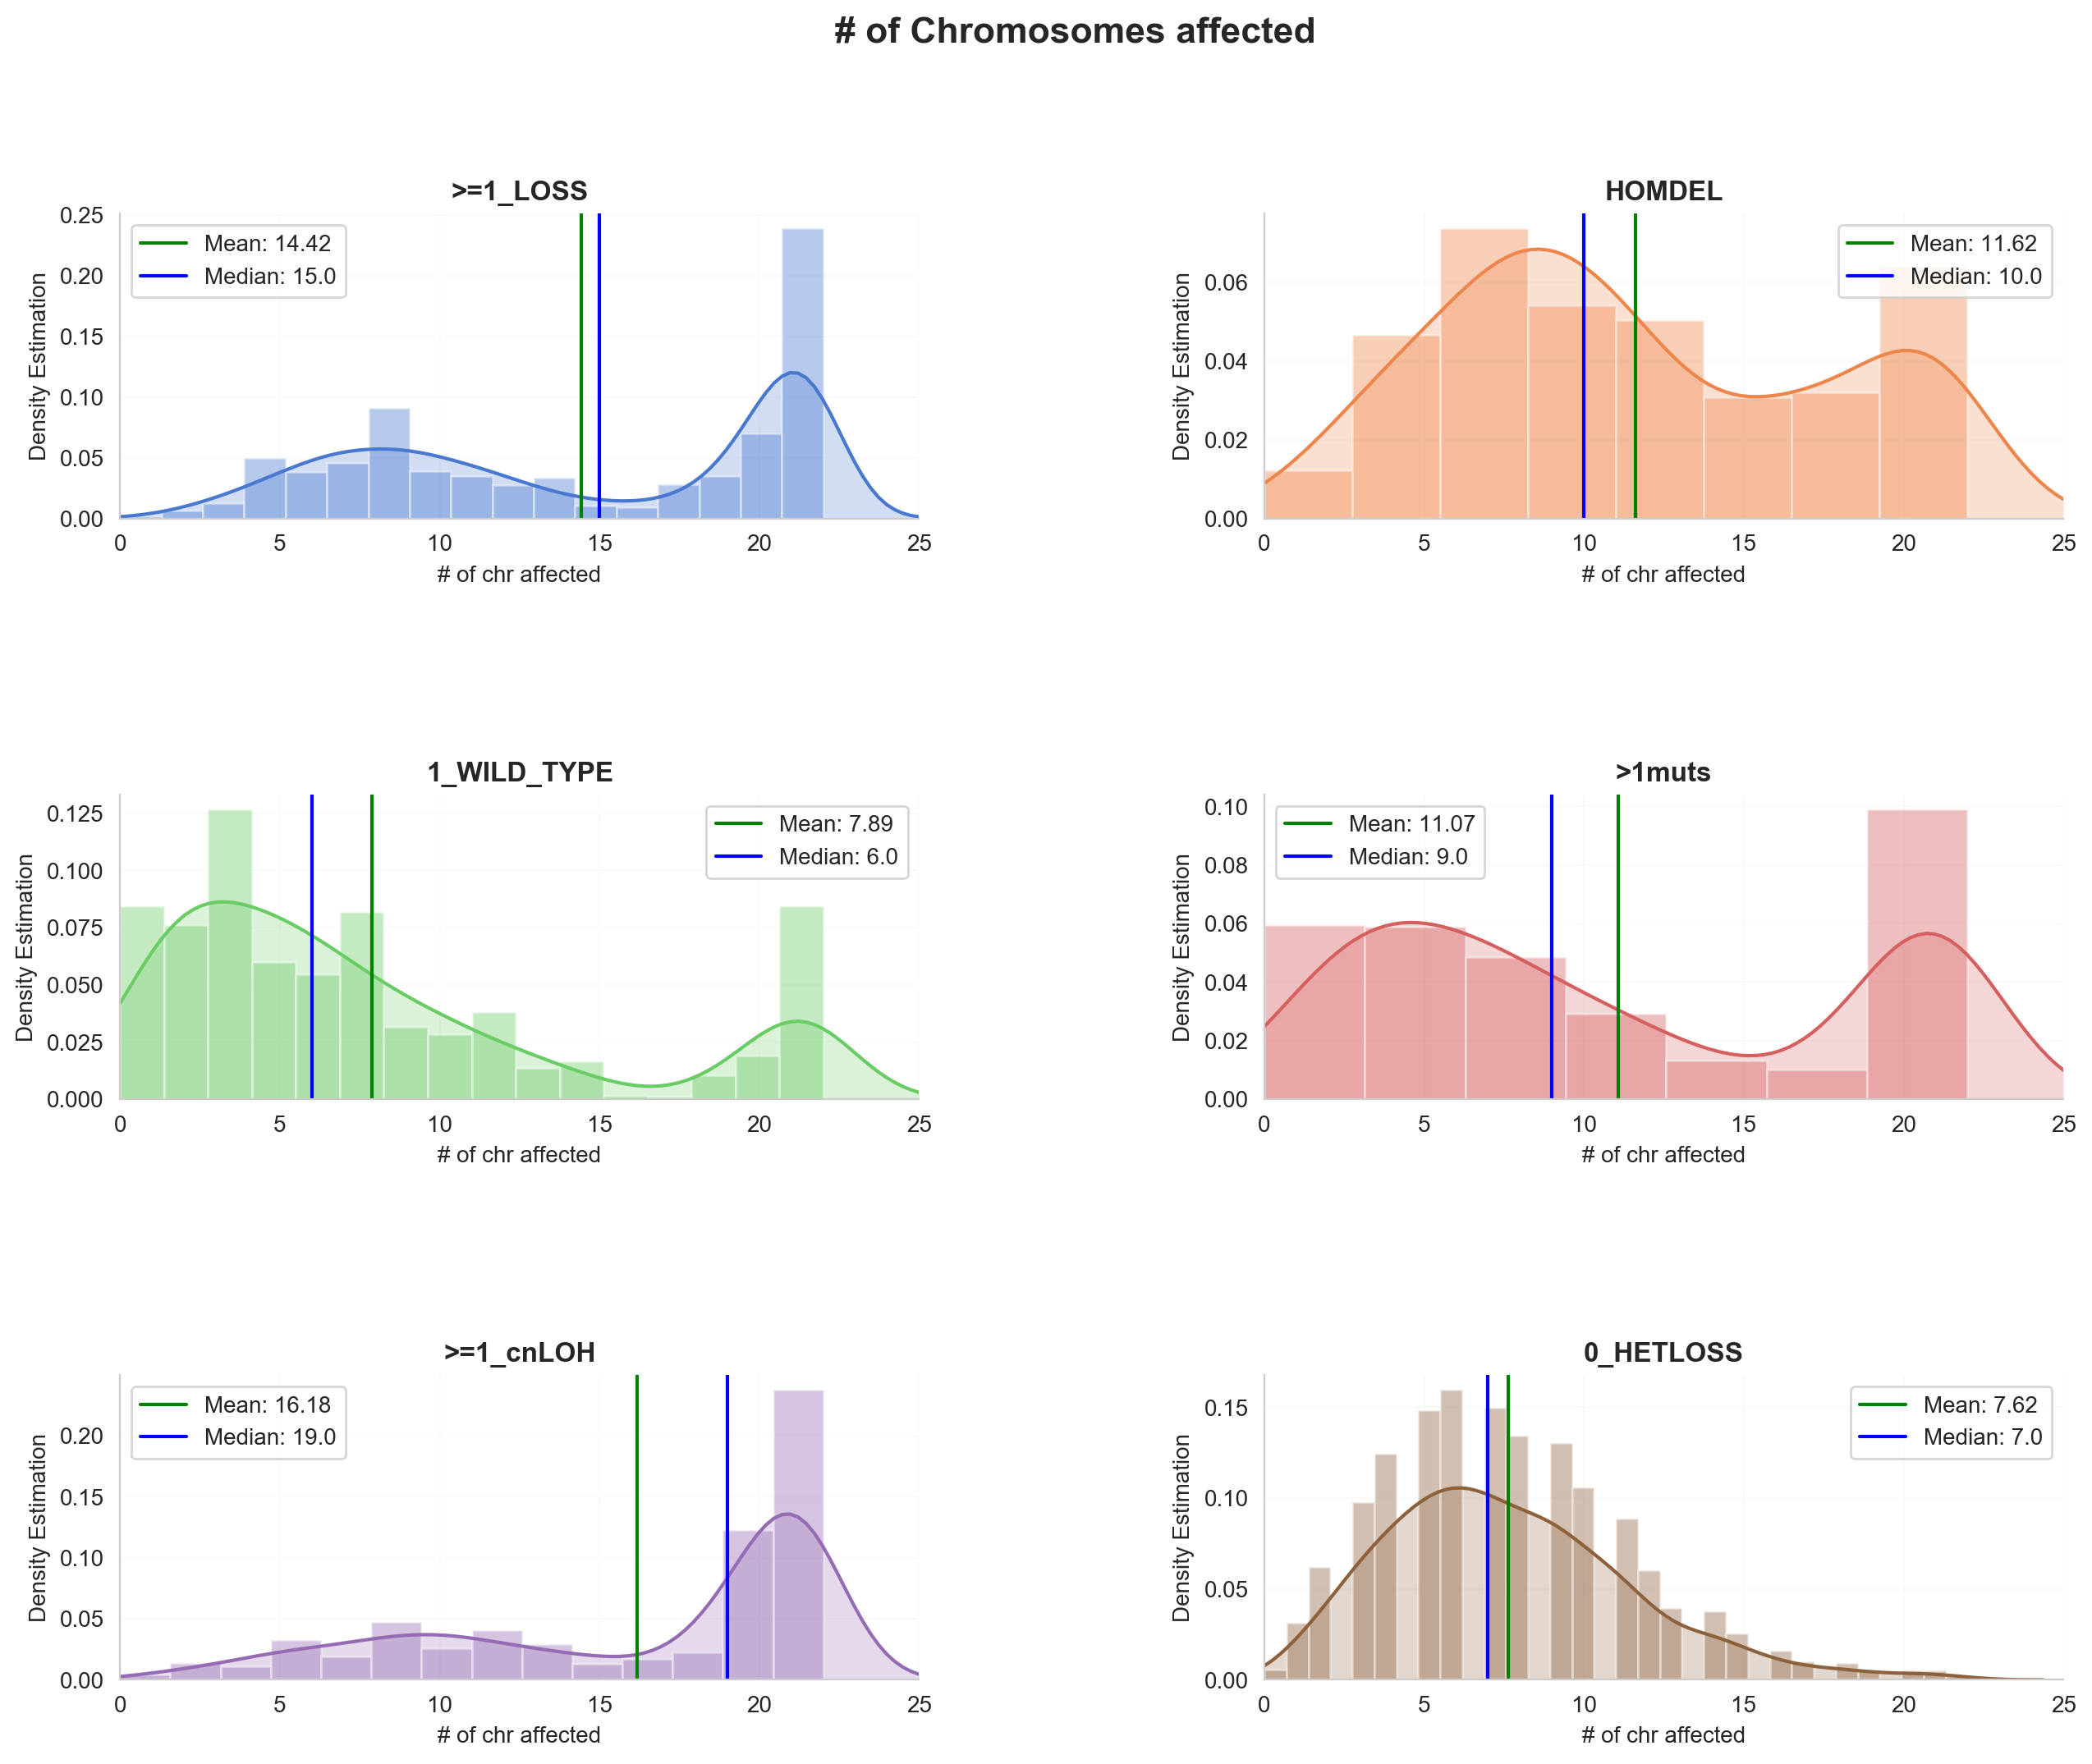

In [15]:
get_densities(master, 
              'chr_affected', 
              fig_title='# of Chromosomes affected', 
              xlabel='# of chr affected', 
              ylabel = 'Density Estimation',
              number=6,
              met_prim=None, clip = (0.0,25.0), x_lim =[0,25])

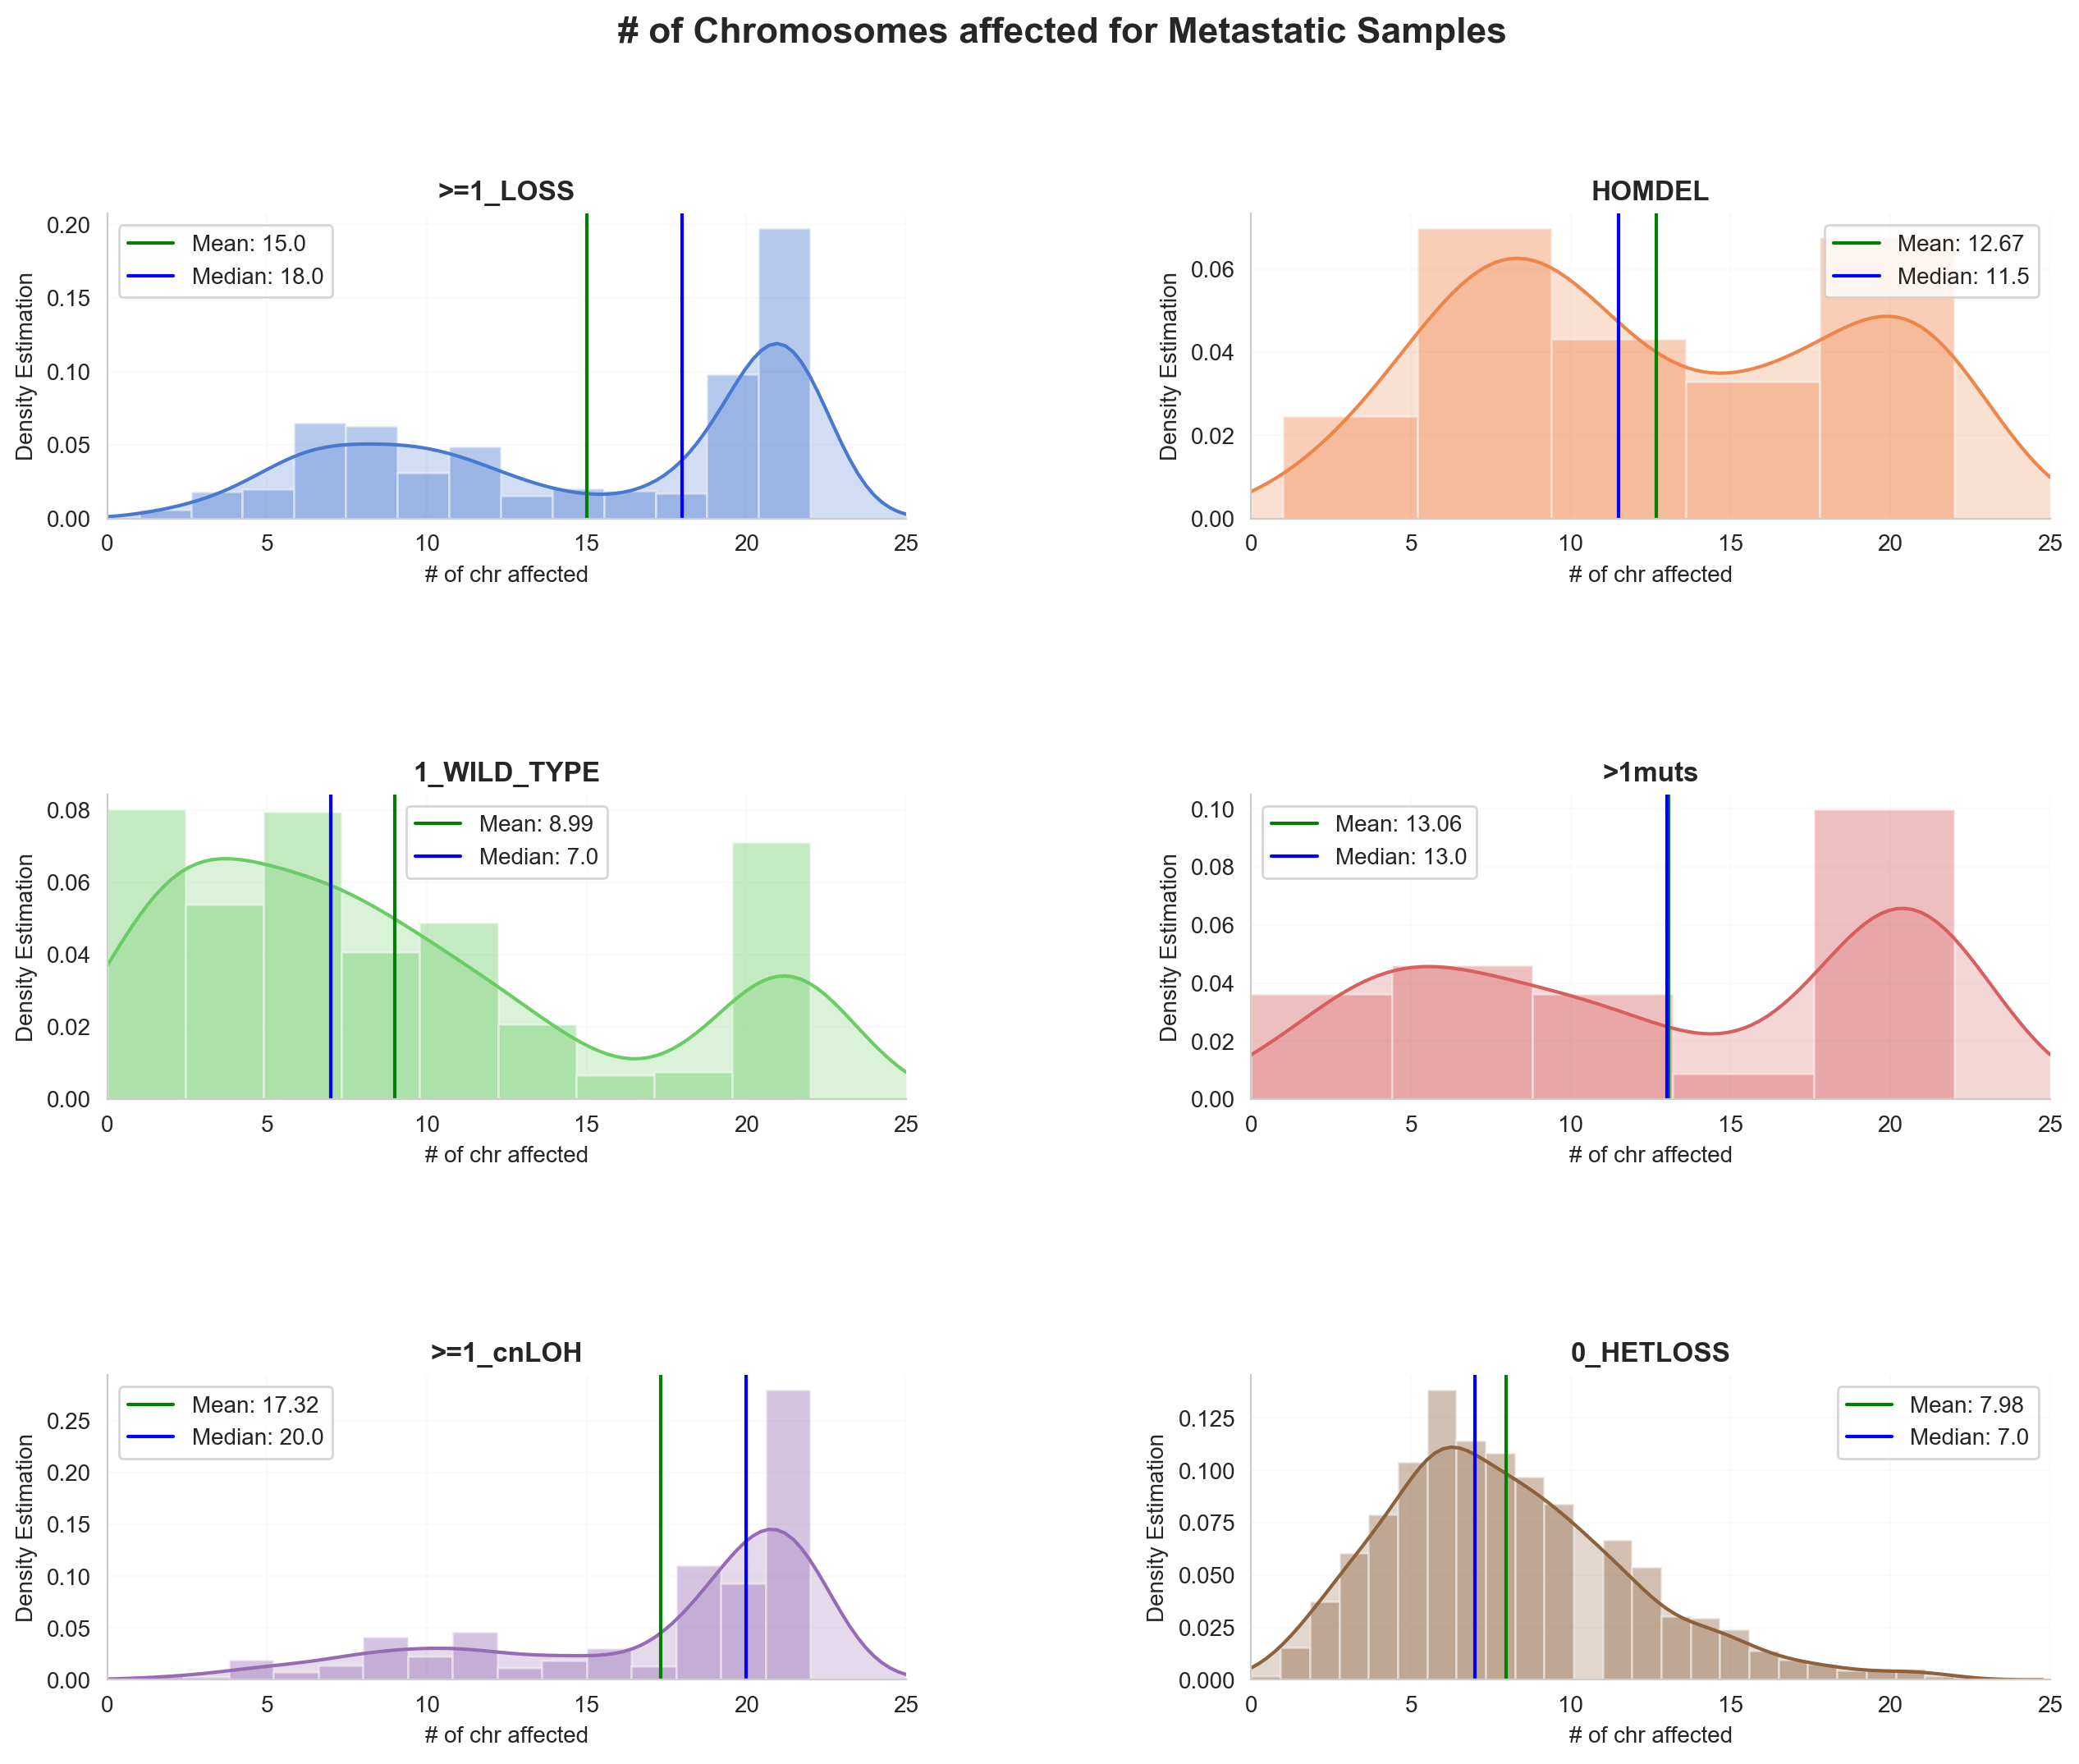

In [16]:
get_densities(master, 
              'chr_affected', 
              fig_title='# of Chromosomes affected for Metastatic Samples', 
              xlabel='# of chr affected', 
              ylabel = 'Density Estimation',
              number=6,
              met_prim='Metastasis', clip = (0.0,25.0), x_lim =[0,25])

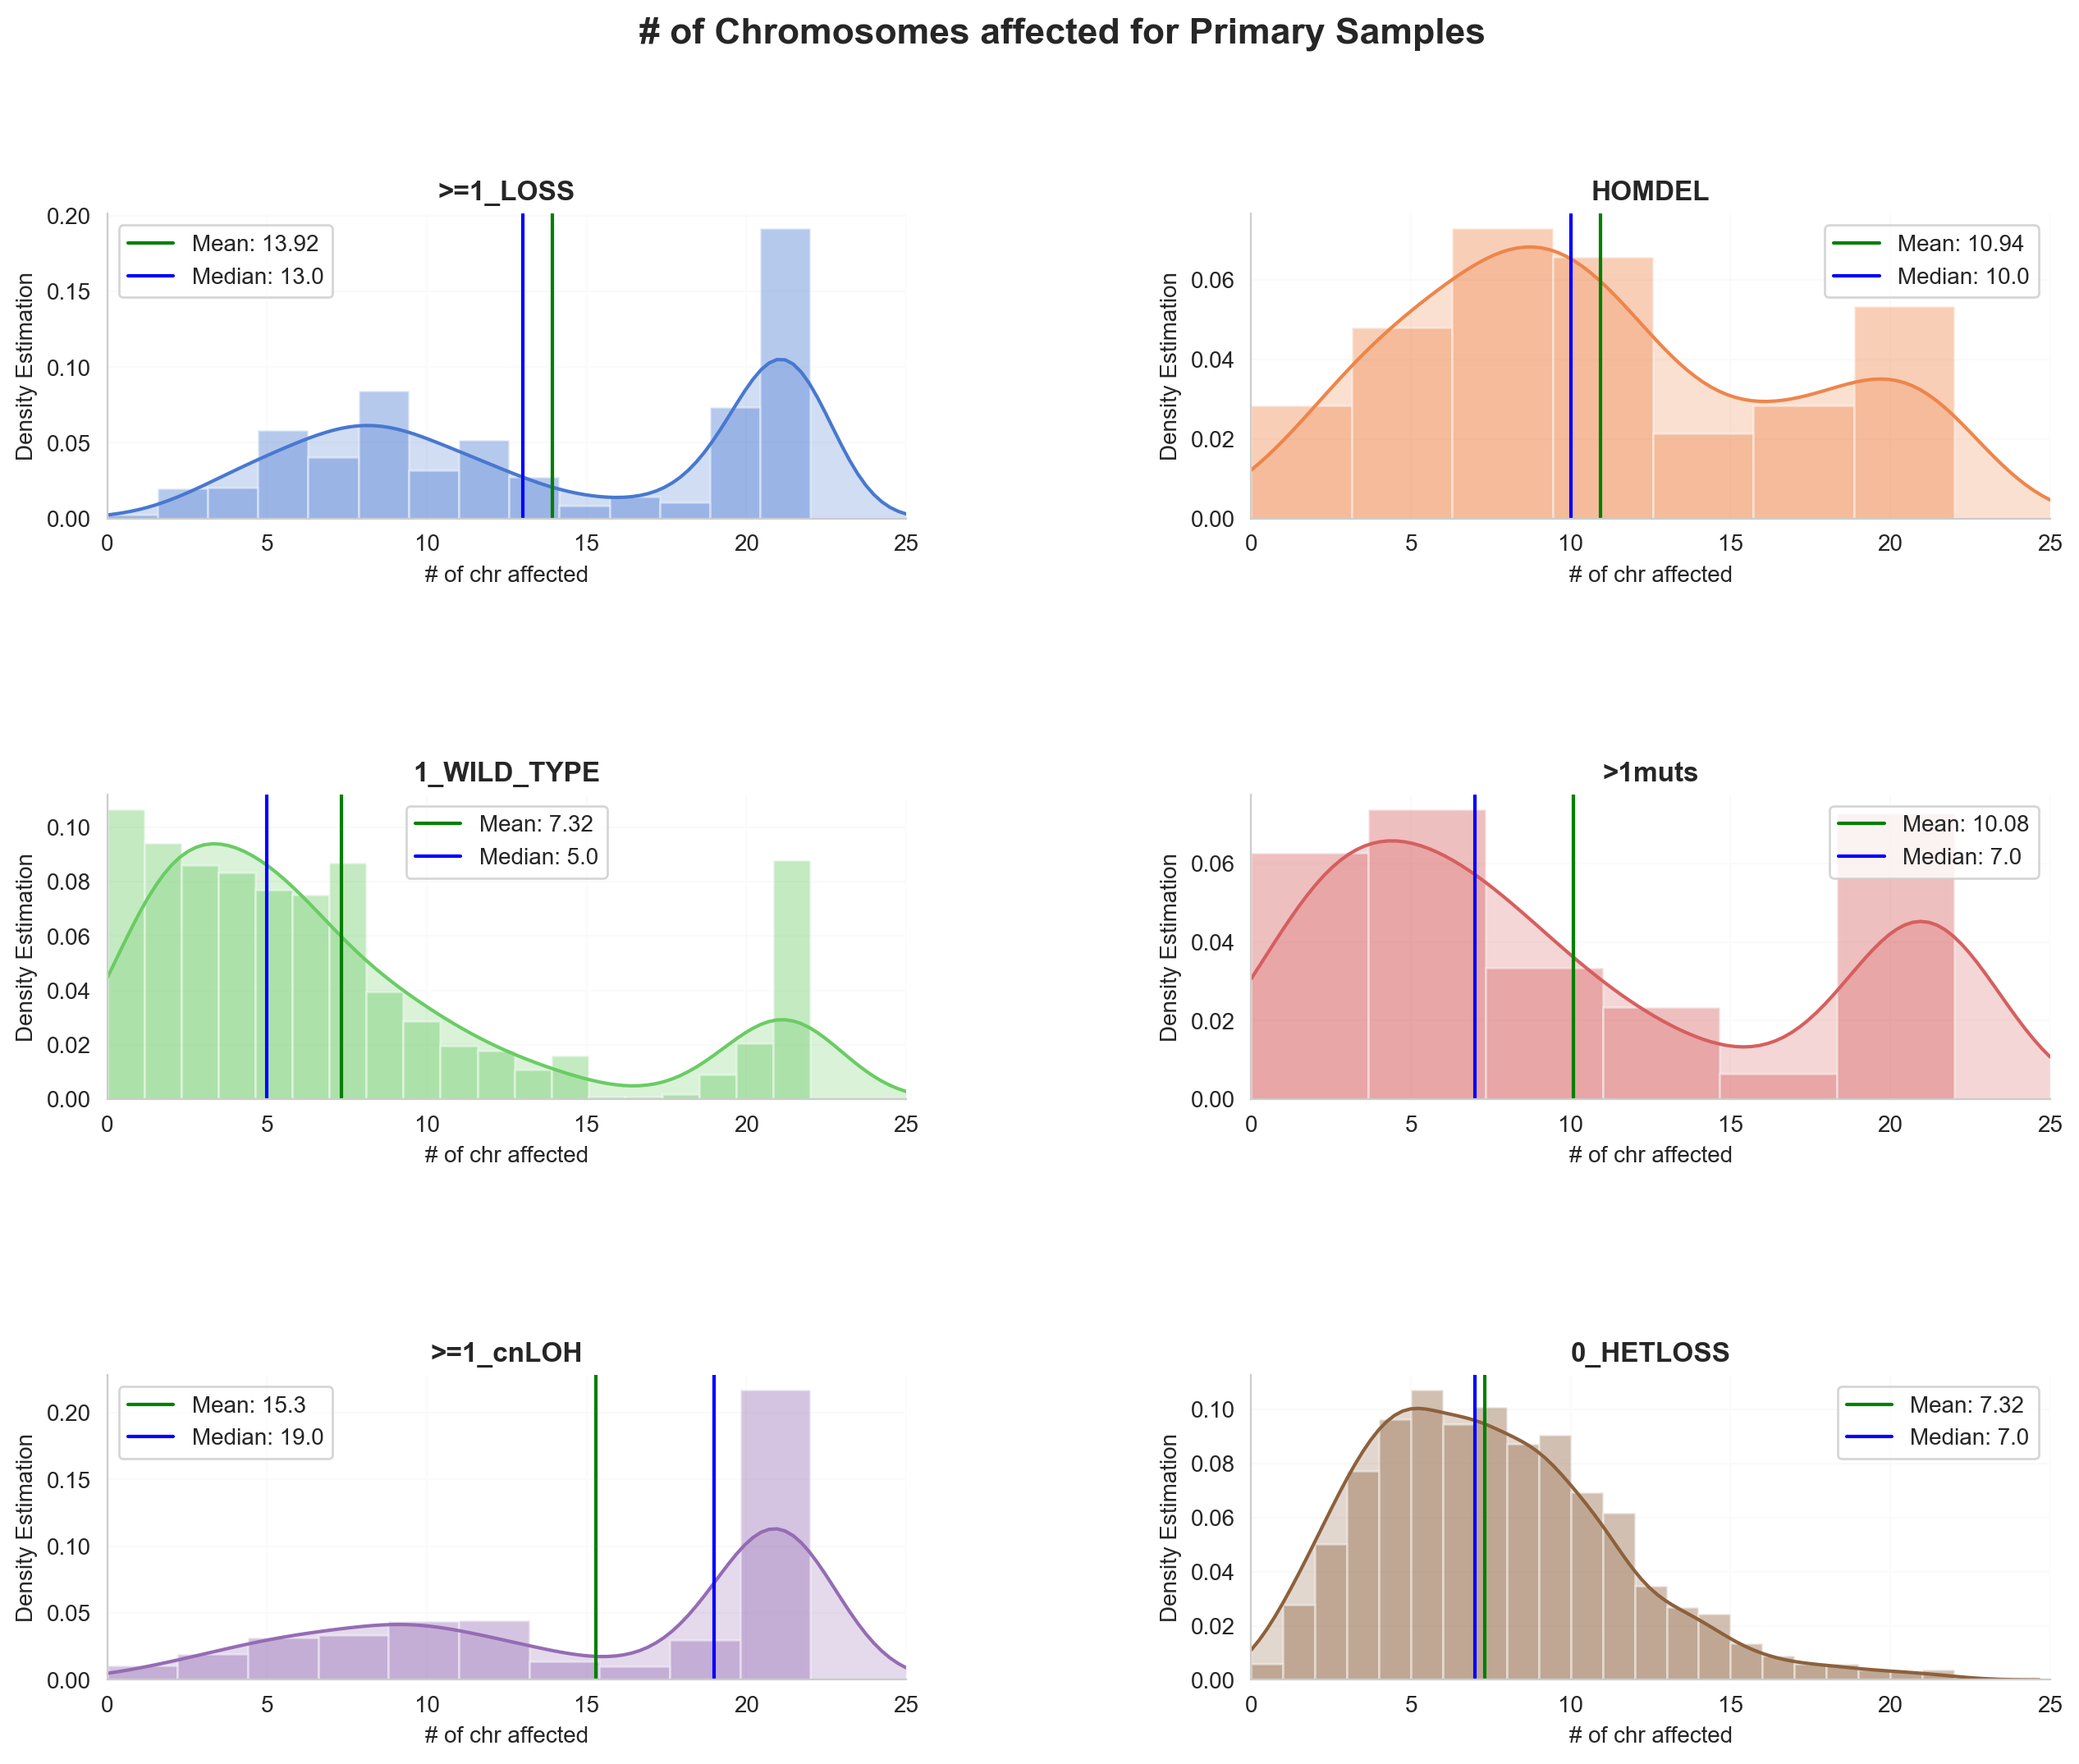

In [17]:
get_densities(master, 
              'chr_affected', 
              fig_title='# of Chromosomes affected for Primary Samples', 
              xlabel='# of chr affected', 
              ylabel = 'Density Estimation',
              number=6,
              met_prim='Primary', clip = (0.0,25.0), x_lim =[0,25])

#### Across Cancer Types (Boxplots)

In [18]:
def boxplot_cancer(df, metrics, thr = None, sample_type=None, order_by = 'median', figsize=(16,15), comparison=False):
    
    fig = plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0), colspan=1)
    
    # If we put a threshold, we define a cancer_list 
    if thr:
        cancer_number = get_groupby(df, 'Cancer_Type', 'count')
        cancer_list_thr = list(cancer_number[cancer_number['count']>=thr].index)
        df_bis = df[df['Cancer_Type'].isin(cancer_list_thr)]
    else: df_bis=df
    
    # To sort in decreasing median order OR in decreasing number of samples
    if order_by == 'median':
        result = df_bis.groupby(["Cancer_Type"])[metrics].aggregate(
                np.median).reset_index().sort_values(metrics,
                                                     ascending=False)
        
    if order_by == 'count':
        result = df_bis.groupby(["Cancer_Type"])[metrics].size().reset_index().sort_values(metrics,
                                                     ascending=False)
    # To have the numbers per cancer_type
    h = get_groupby(df_bis, 'Cancer_Type', 'count')
    numbers = []
    for cancer in list(result.Cancer_Type):
        numbers.append(int(h[h.index == cancer]['count']))
    cancer_number = [i + ' (' + str(j) + ')' for i, j in zip(list(result.Cancer_Type), numbers)]

    if comparison:
        sns.boxplot(y="Cancer_Type",
                x=metrics,
                data=df_bis,
                ax=ax1,
                dodge=True,
                hue='Sample_Type',
                palette=list(sns.color_palette("muted")),
                order=result['Cancer_Type'])
    
    else:
        sns.boxplot(y="Cancer_Type",
                    x=metrics,
                    data=df_bis,
                    ax=ax1,
                    dodge=False,
                    color=list(sns.color_palette("muted"))[0],
                    order=result['Cancer_Type'])

    for i,artist in enumerate(ax1.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*6,i*6+6):
            line = ax1.lines[j]
            if j%6 == 4 : line.set_color('black')
            else: line.set_color('None')
            line.set_mfc('None')
            line.set_mec('None')

    ax1.set_yticklabels(cancer_number, fontsize=12)
    
    return fig, ax1

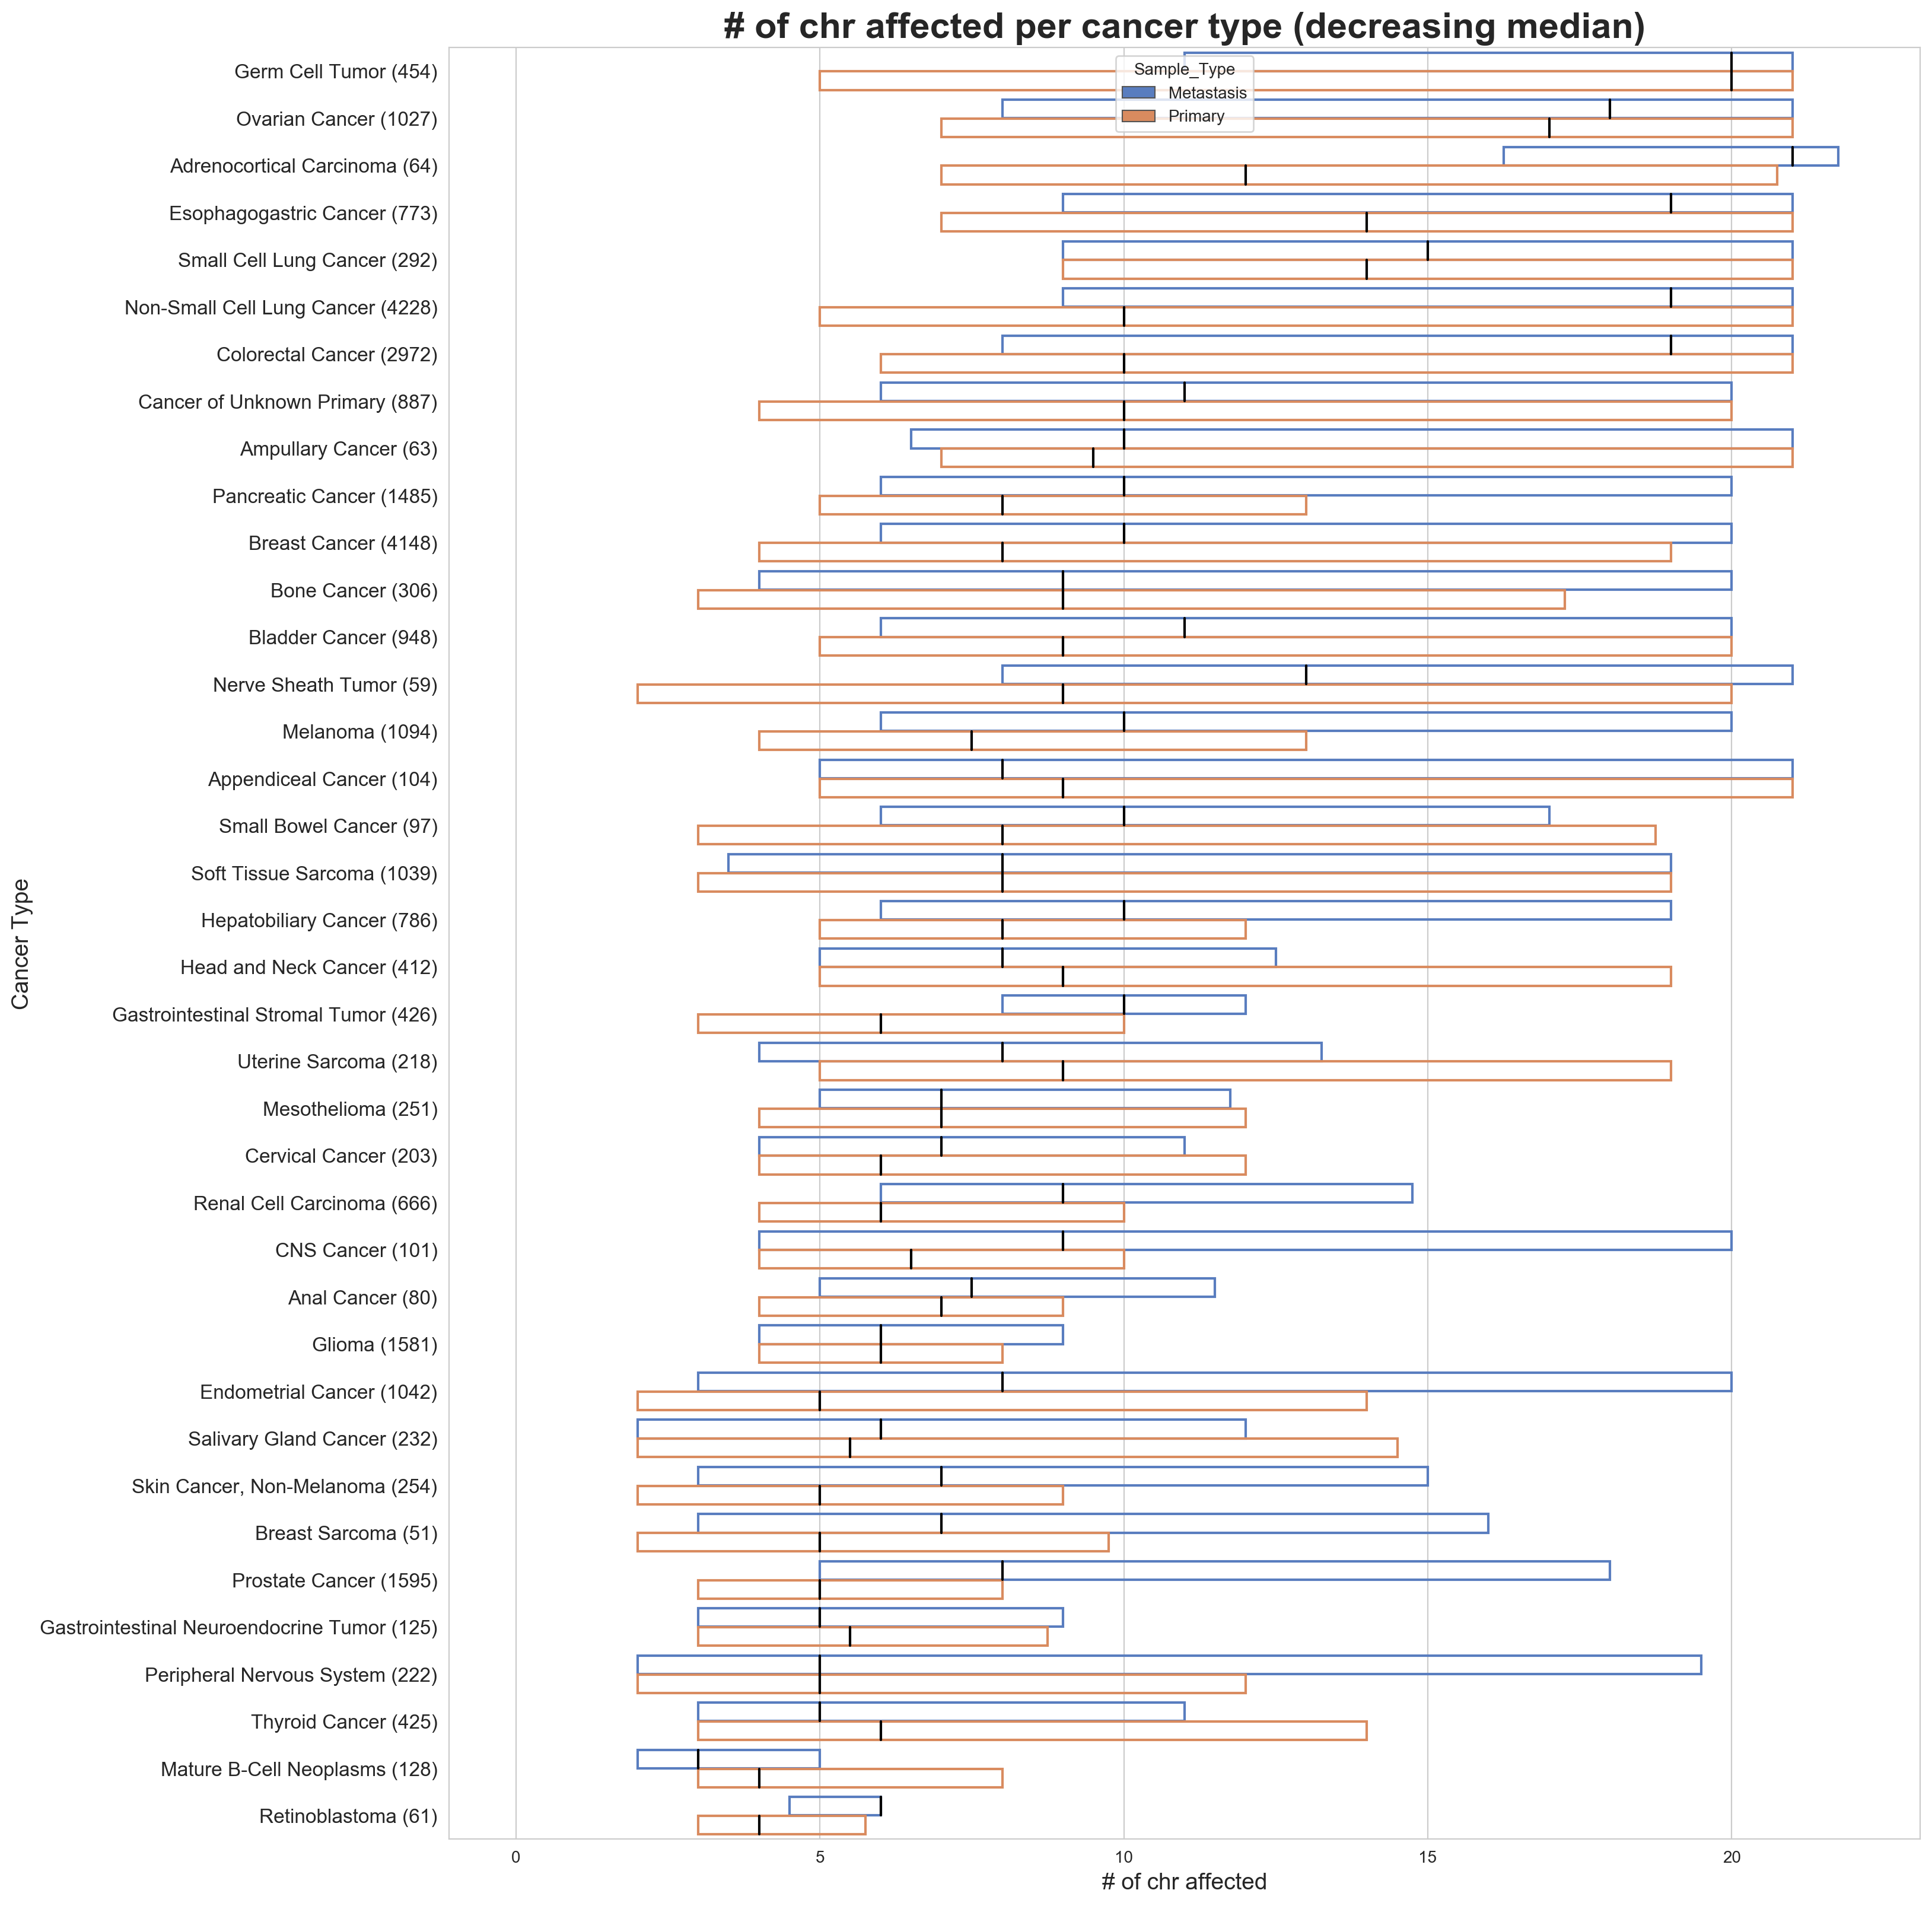

In [19]:
sns.set_style("whitegrid", {'grid.color': '.8'})
fig, ax = boxplot_cancer(master, 'chr_affected', order_by = 'median', thr=50, sample_type=None, figsize=(16,20), comparison=True)
ax.set_title('# of chr affected per cancer type (decreasing median)', weight='bold', fontsize=22)
ax.set_ylabel('Cancer Type', fontsize=14)
ax.set_xlabel('# of chr affected', fontsize=14)
plt.show()

### Scatterplot chr_affected | purity

In [20]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec, title):
        self.fig = fig
        self.sg = seaborngrid
        self.title = title
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)
        
        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())
    
    def set_title(self, title="", **kwargs):
        """ Set the title of the figure

        Parameters
        ----------
        title : string
            Title for the figure
        kwargs : key, value mappings

        Returns
        -------
        self : JointGrid instance
            returns `self`
        """
        self.sg.ax_joint.set_title(title, **kwargs)
        return self
        

#### Subgroup Comparison

In [44]:
def get_jointplots_subgroups(df:pd.DataFrame, metrics:list, met_prim:str = None, figsize=(15,12), cancer_type=None):
    # We initialize the figure
    sns.set_style("whitegrid", {'grid.color': '1.'})
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(3, 2)
    groups = ['>=1_LOSS', 'HOMDEL', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', '0_HETLOSS']
    gs.tight_layout(fig)
    
    if met_prim:
        df = df[df['Sample_Type'] == met_prim]
        
    if cancer_type:
        df = df[df['Cancer_Type'].isin(cancer_type)]
        
    # To have the numbers per group
    h = get_groupby(df, 'mut_cn_group', 'count')
    numbers = []
    for group in groups:
        numbers.append(int(h[h.index == group]['count']))
    cancer_number = [i + ' (' + str(j) + ')' for i, j in zip(groups, numbers)]

    
    for group,i in zip(groups, range(len(groups))):
        data = df[df['mut_cn_group'] == group]
        
        g = sns.jointplot(metrics[0], metrics[1], data=data, kind="kde", space=0, color=my_colors[i])
        mg = SeabornFig2Grid(g, fig, gs[i], cancer_number[i])
        mg.set_title(cancer_number[i], pad=-207, weight = 'bold')
    gs.tight_layout(fig)
    
    return fig

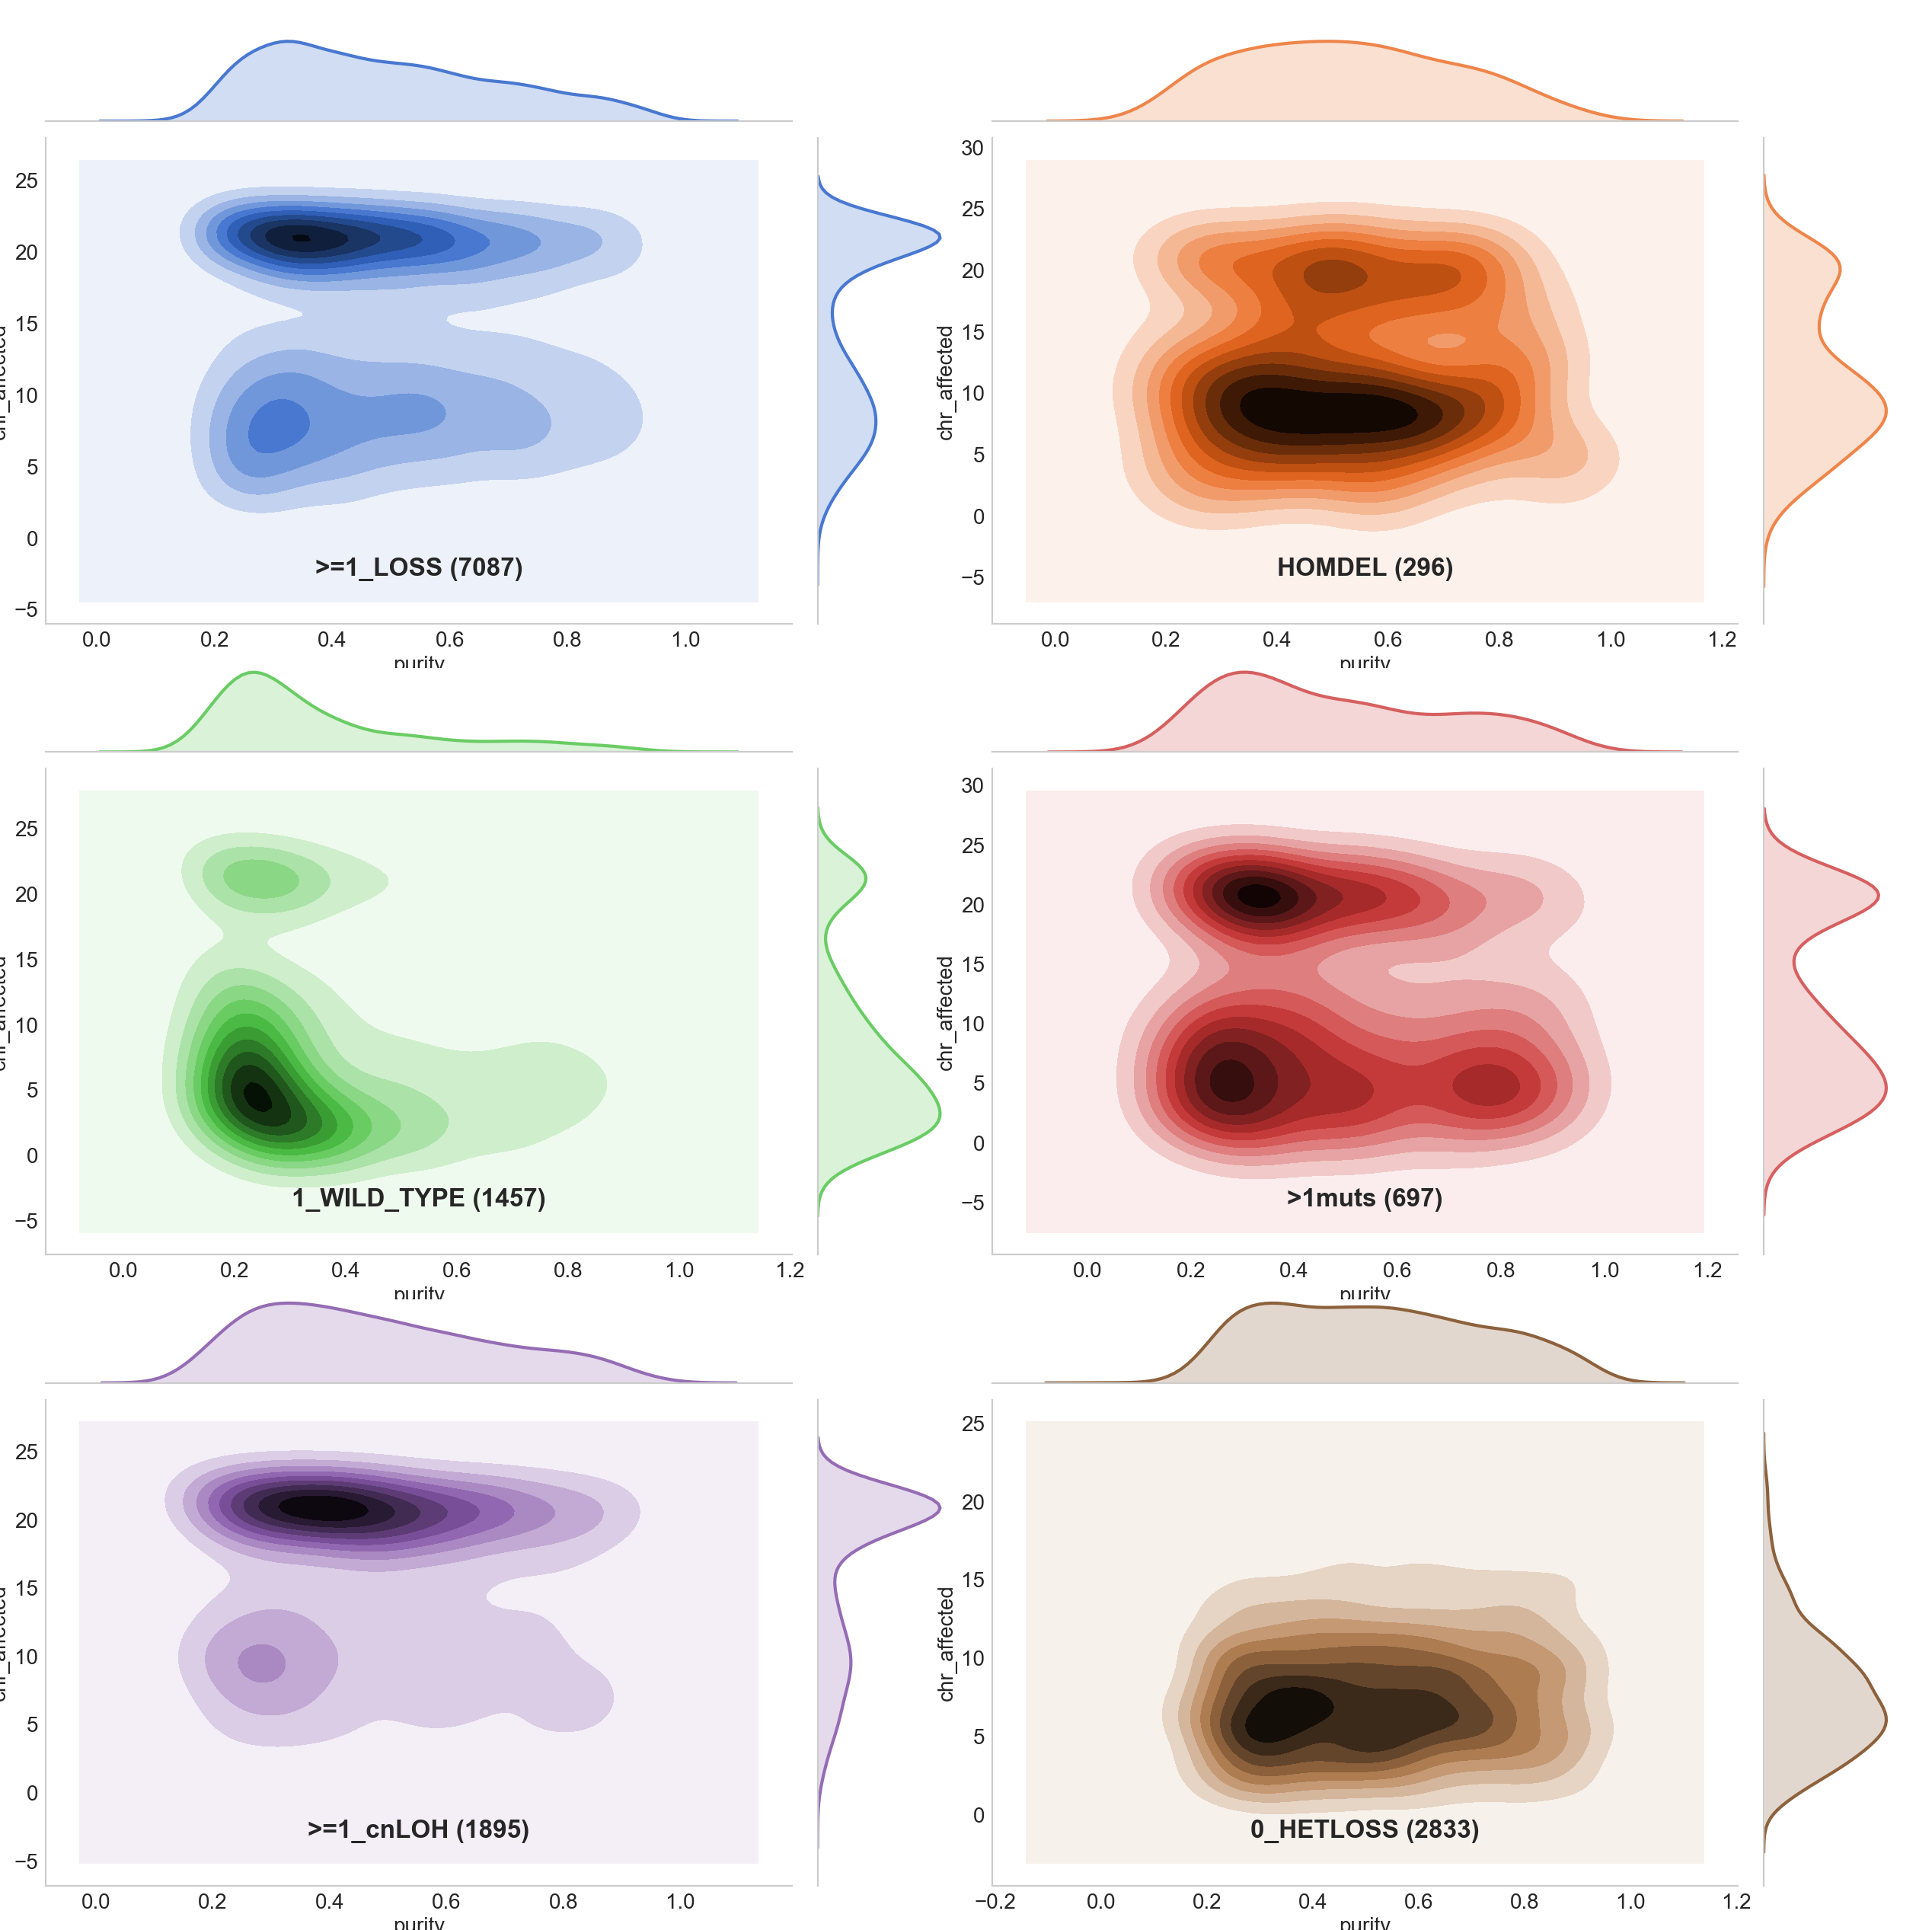

In [45]:
# All Samples
fig = get_jointplots_subgroups(master, 
             metrics=['purity', 'chr_affected'],   
             met_prim= None, 
             figsize=(25,25))

In [ ]:
# Met Samples
fig = get_jointplots_subgroups(master, 
             metrics=['purity', 'chr_affected'], 
             met_prim= 'Metastasis', 
             figsize=(25,25))

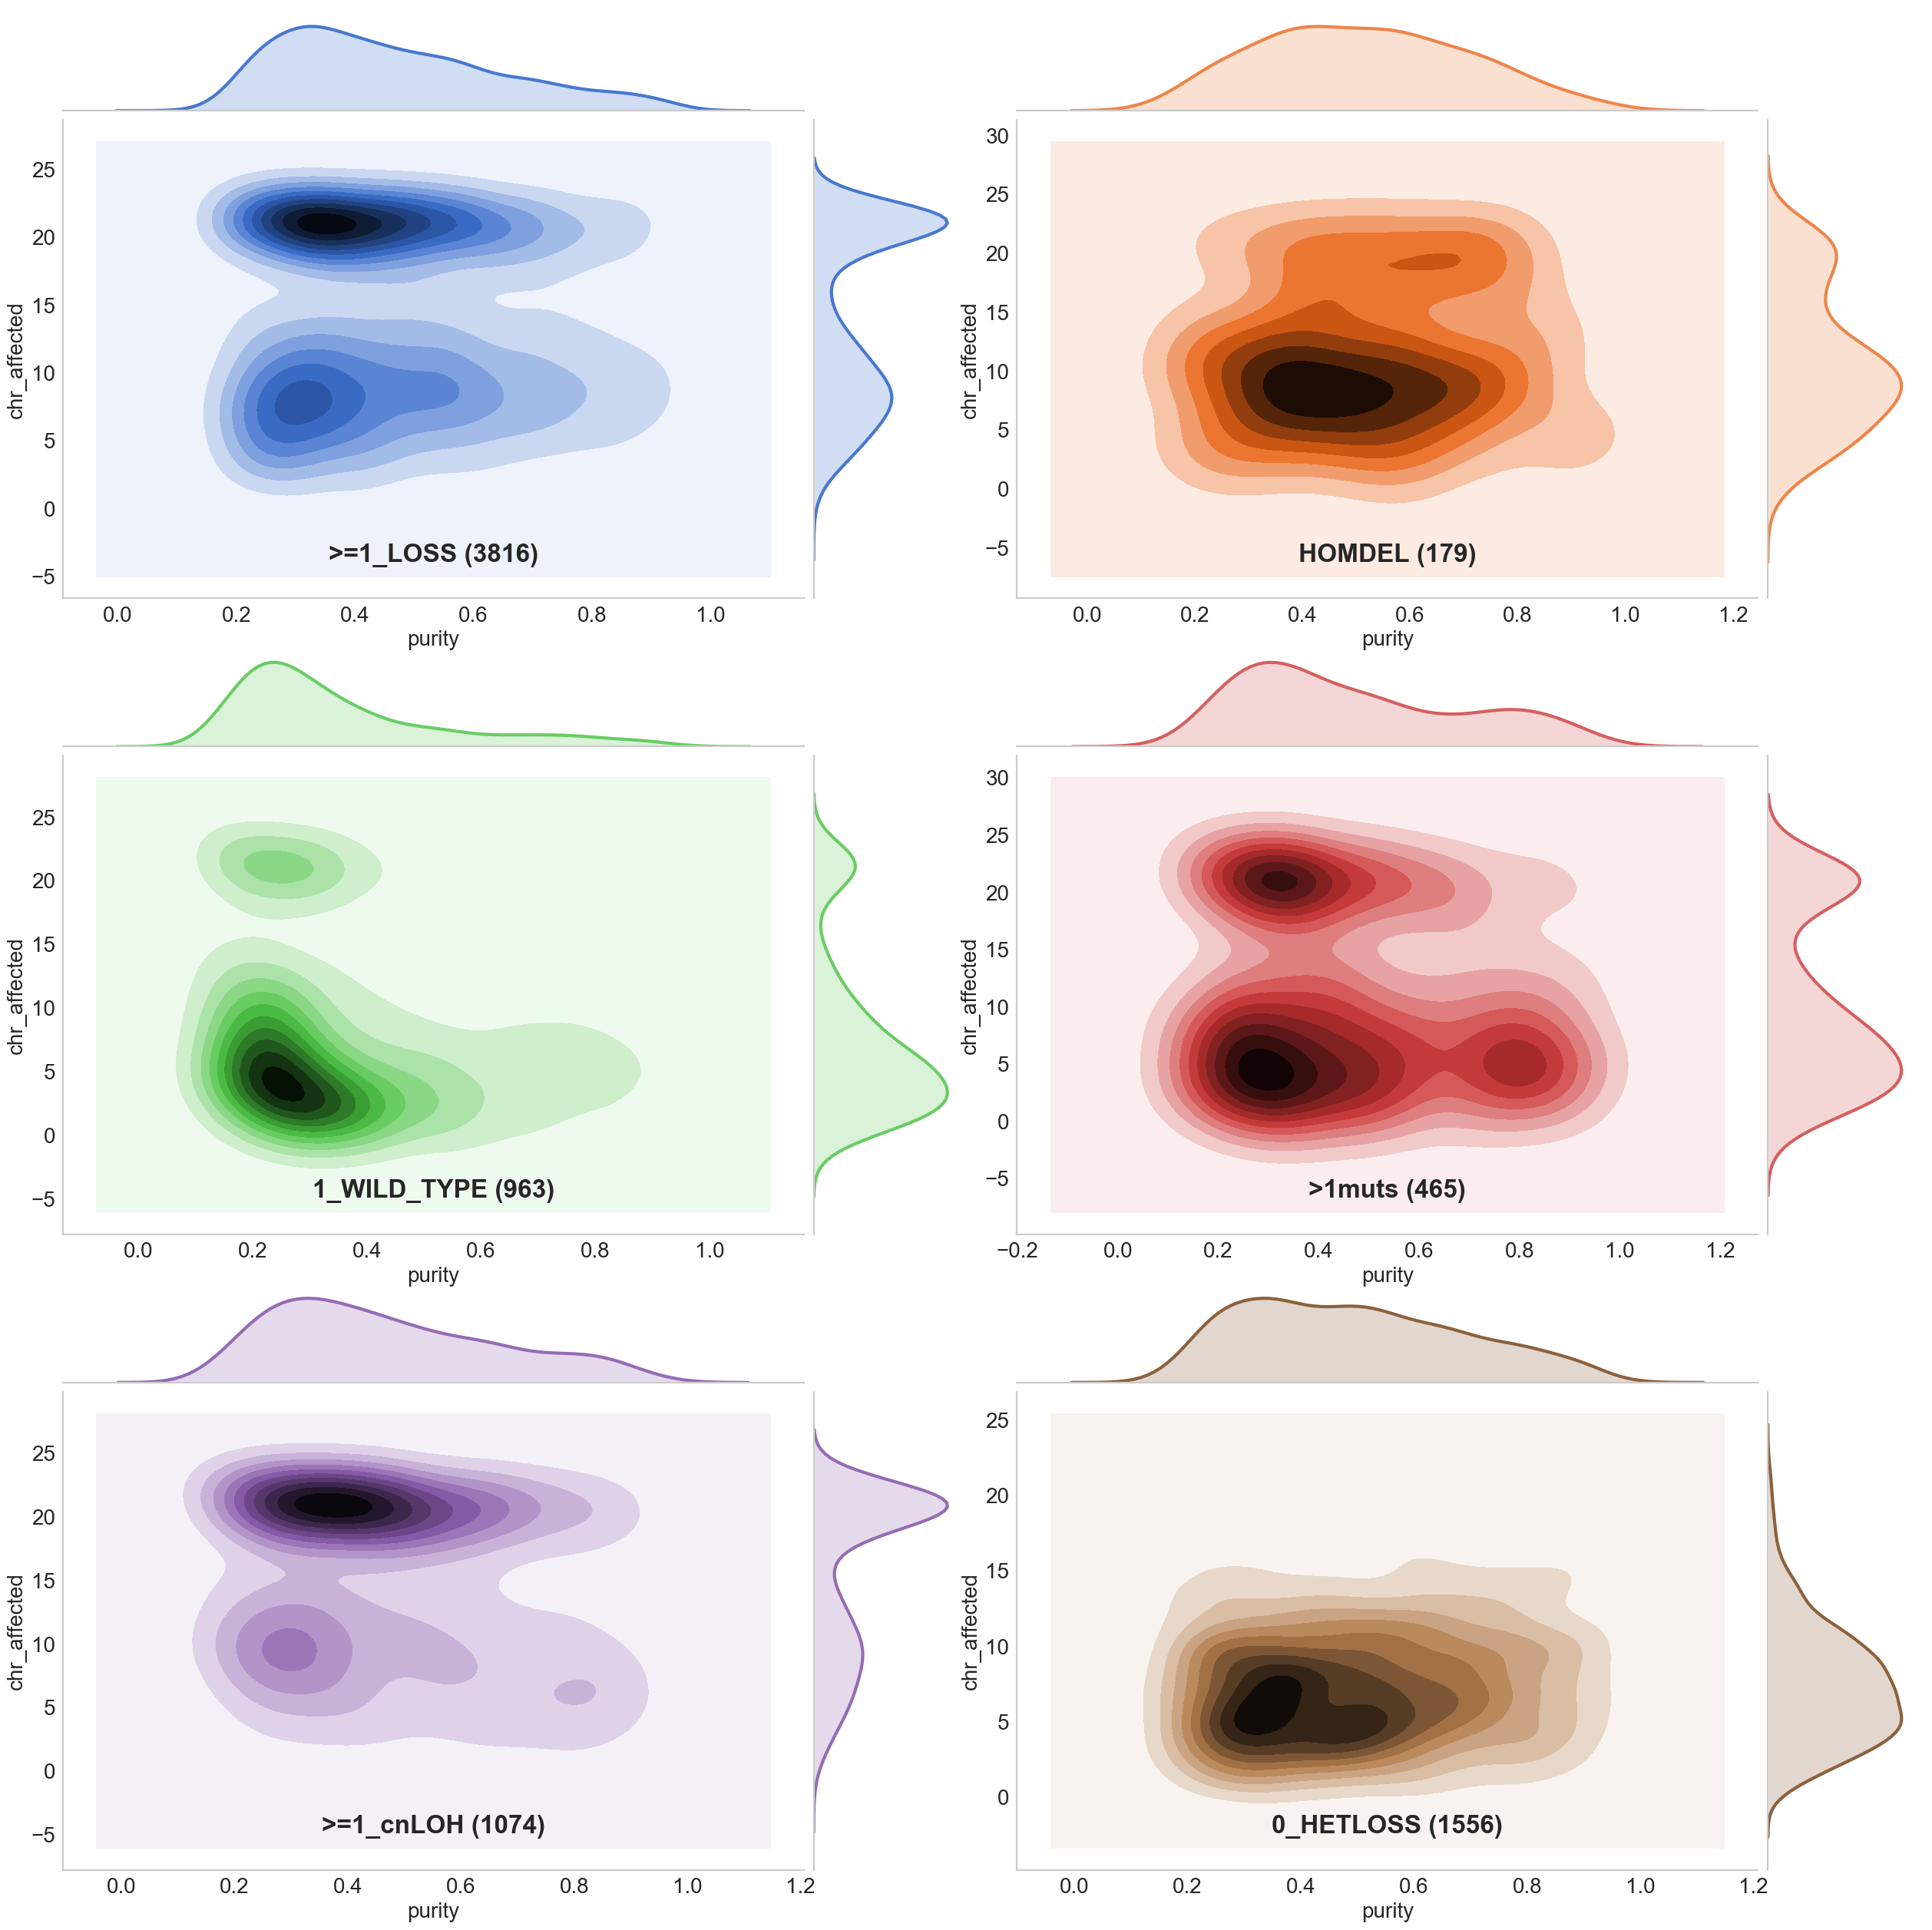

In [96]:
# Primary Samples
fig = get_jointplots_subgroups(master, 
             metrics=['purity', 'chr_affected'],  
             met_prim= 'Primary', 
             figsize=(25,25))

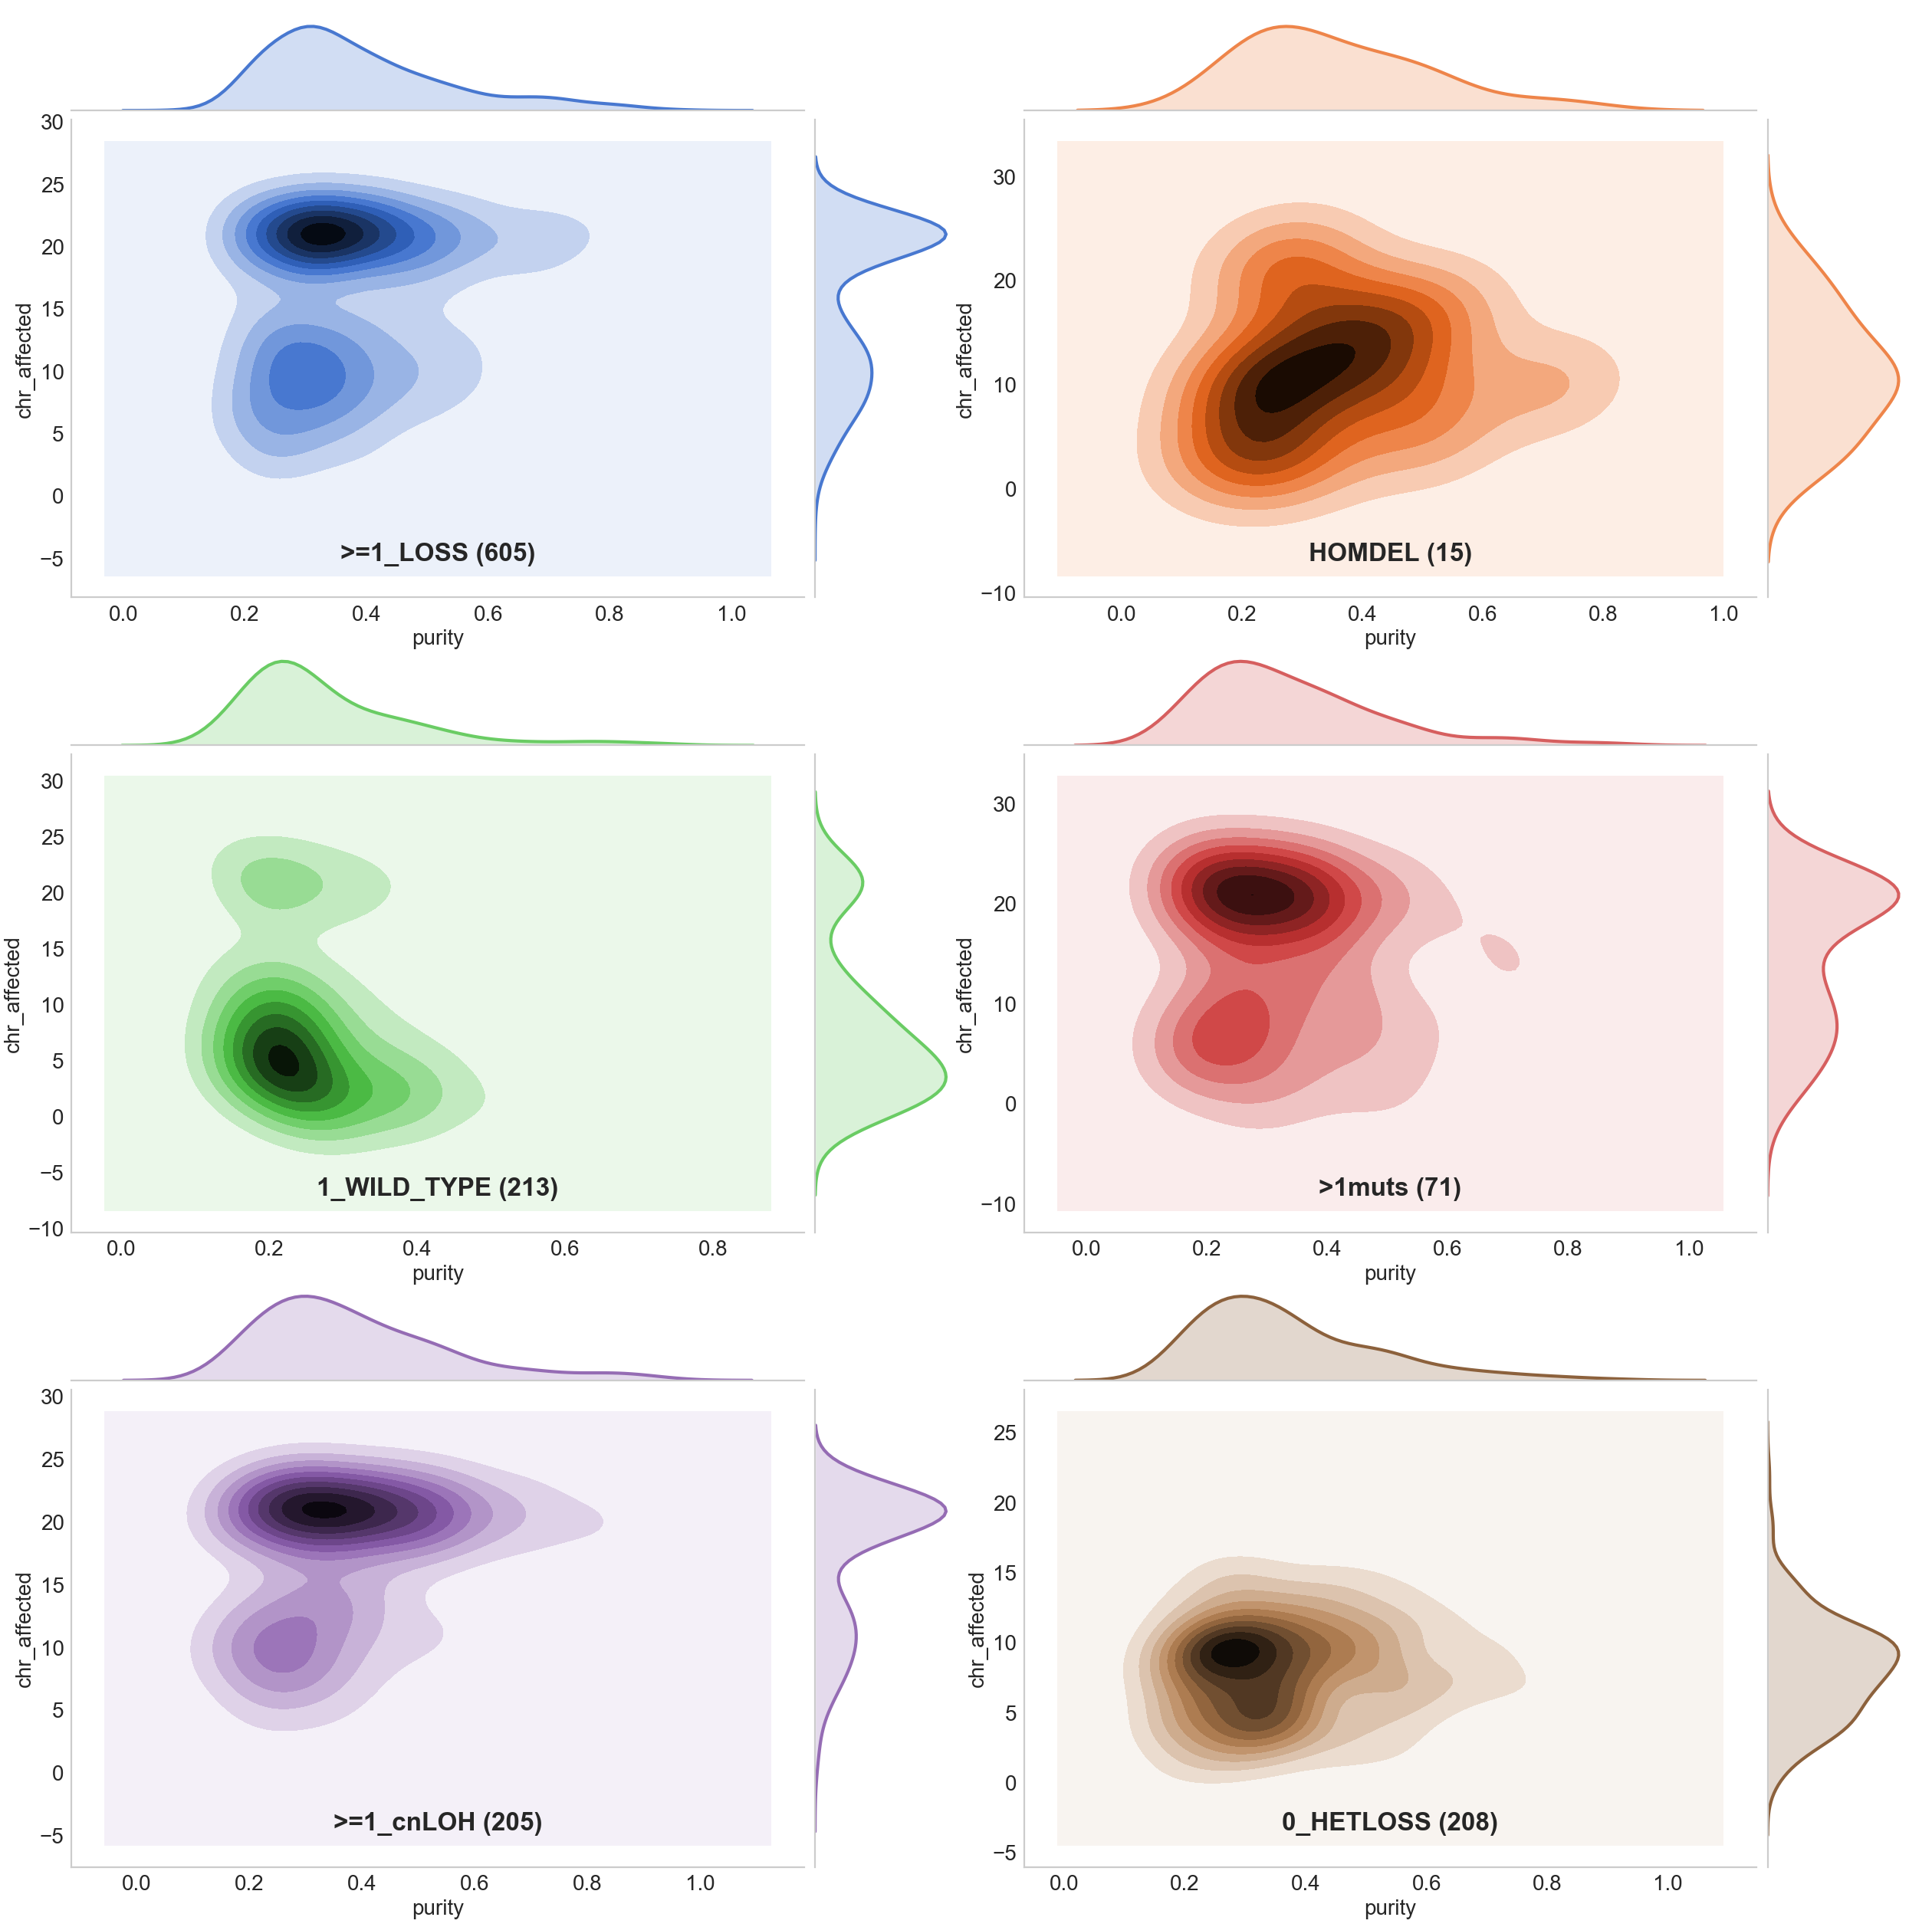

In [99]:
# Primary Samples in Non-Small Cell Lung Cancer
fig = get_jointplots_subgroups(master, 
             metrics=['purity', 'chr_affected'],  
             met_prim= 'Primary', 
             figsize=(25,25), 
             cancer_type= ['Non-Small Cell Lung Cancer'])

#### Cancer Comparison

In [39]:
def get_jointplots_cancers(df:pd.DataFrame, metrics:list, met_prim:str = None, subgroup:list=None):
    sns.set_style("whitegrid", {'grid.color': '1.'})
    if met_prim:
        df = df[df['Sample_Type'] == met_prim]
    
    if subgroup:
        df = df[df['mut_cn_gorup'].isin(subgroup)]
    
    groups = list(set(df.Cancer_Type))
    
    # We initialize the figure
    fig = plt.figure(figsize=(25, 250))
    gs = gridspec.GridSpec(19, 2)
    

    # To have the numbers per group
    h = get_groupby(df, 'Cancer_Type', 'count')
    numbers = []
    for group in groups:
        numbers.append(int(h[h.index == group]['count']))
    cancer_number = [i + ' (' + str(j) + ')' for i, j in zip(groups, numbers)]

    
    for group,i in zip(groups, range(len(groups))):
        data = df[df['Cancer_Type'] == group]

        g = sns.jointplot(metrics[0], metrics[1], data=data, kind="kde", space=0, color=my_colors[4])
        mg = SeabornFig2Grid(g, fig, gs[i], cancer_number[i])
        mg.set_title(cancer_number[i], pad=-370, weight = 'bold')
    
    gs.tight_layout(fig)
   
    plt.show()

In [40]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def get_total_jointplots(df: pd.DataFrame, thr: int):

    # If we put a threshold, we define a cancer_list 
    cancer_number = get_groupby(df, 'Cancer_Type', 'count')
    cancer_list_thr = list(cancer_number[cancer_number['count']>=thr].index)
    df = df[df['Cancer_Type'].isin(cancer_list_thr)]
    
    cancer_chunks = list(chunks(cancer_list_thr, 38))
    
    for chunk in cancer_chunks:
        df = df[df['Cancer_Type'].isin(chunk)]
        get_jointplots_cancers(df, 
             metrics=['purity', 'chr_affected'], 
             met_prim= None, 
             subgroup=None)

In [41]:
%%time
get_total_jointplots(master, thr=50)

CPU times: user 2min 12s, sys: 2.48 s, total: 2min 15s
Wall time: 2min 5s
